In [29]:
import os
import pandas as pd
import numpy as np
## first file in current dir (with full path)
file = os.path.join(os.getcwd(), os.listdir(os.getcwd())[0])
file
os.path.dirname(file) ## directory of file
os.path.dirname(os.path.dirname(file)) ## directory of directory of file

from os import listdir
from os.path import isfile, join
mypath = '/Users/lehuyen/Dropbox/Stage_data/insa01'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

index = 0
list_all_df = []
for  file in onlyfiles:
    if 'csv' in file:
        if index ==0:
            path = os.path.join(mypath, file)
            df_all = pd.read_csv(path,  sep='\n', header=0, delimiter=";",decimal=',')
            list_all_df.append(df_all)
        else:
            path = os.path.join(mypath, file)
            this_df = pd.read_csv(path,  sep='\n', header=0, delimiter=";",decimal=',')
            df_all = df_all.append(this_df)
            list_all_df.append(this_df)
        index +=1
        
print(df_all.shape)


(12096, 6)


In [30]:
df_all.to_csv('/Users/lehuyen/Dropbox/Stage_data/insa_all.csv',sep =',', index = None)

In [31]:
#insa = pd.read_csv('/Users/lehuyen/Dropbox/Stage_data/insa_all.csv', header=0, delimiter=",",decimal=',')
insa = pd.read_csv('/Users/lehuyen/Dropbox/Stage_data/insa_all.csv')
insa.columns =['Time','CPU','MEM','REC', 'TRAN','Status']

In [32]:
insa.head()

,Time,CPU,MEM,REC,TRAN,Status
0,2019-09-07T00:00:00+02:00,3.336000e+09,7.560757e+10,992256.0,249856.0,1.0
1,2019-09-07T00:02:00+02:00,2.204500e+09,7.563326e+10,960512.0,248832.0,1.0
2,2019-09-07T00:04:00+02:00,2.156000e+09,7.560495e+10,1046528.0,254464.0,1.0
3,2019-09-07T00:06:00+02:00,2.358000e+09,7.558450e+10,761344.0,488448.0,1.0
4,2019-09-07T00:08:00+02:00,2.702000e+09,7.565633e+10,4247552.0,512512.0,1.0


In [33]:
!ls 

27juin_25juillet(jeudi).ipynb images
ESX_nouveau.ipynb             insa01- autre_methode.ipynb
data_from_jan_july.ipynb      insa01.ipynb
data_month.ipynb              insa_all.csv
extract_all_datas.ipynb


In [34]:
for df in list_all_df:
    df.columns =['Time','CPU','MEM','REC', 'TRAN','Status']

In [35]:
df_all.columns =['Time','CPU','MEM','REC', 'TRAN','Status']

In [36]:
list_all_df[0].columns

Index(['Time', 'CPU', 'MEM', 'REC', 'TRAN', 'Status'], dtype='object')

In [37]:
df_all.head()

,Time,CPU,MEM,REC,TRAN,Status
0,2019-09-07T00:00:00+02:00,3.336000e+09,7.560757e+10,992256.0,249856.0,1.0
1,2019-09-07T00:02:00+02:00,2.204500e+09,7.563326e+10,960512.0,248832.0,1.0
2,2019-09-07T00:04:00+02:00,2.156000e+09,7.560495e+10,1046528.0,254464.0,1.0
3,2019-09-07T00:06:00+02:00,2.358000e+09,7.558450e+10,761344.0,488448.0,1.0
4,2019-09-07T00:08:00+02:00,2.702000e+09,7.565633e+10,4247552.0,512512.0,1.0


In [38]:
df_all.describe()

,CPU,MEM,REC,TRAN,Status
count,1.201700e+04,1.201600e+04,1.201600e+04,1.201600e+04,12016.0
mean,2.670903e+09,7.556654e+10,2.341185e+06,3.307101e+07,1.0
std,5.109093e+08,1.014202e+08,3.740553e+06,7.735839e+07,0.0
min,1.403000e+09,7.536430e+10,6.338560e+05,1.751040e+05,1.0
25%,2.286000e+09,7.549747e+10,9.482240e+05,3.220480e+05,1.0
50%,2.602000e+09,7.554204e+10,1.216000e+06,4.229120e+05,1.0
75%,2.993000e+09,7.559984e+10,3.092480e+06,4.880640e+06,1.0
max,5.759500e+09,7.591376e+10,1.478758e+08,3.052544e+08,1.0


In [39]:
df.columns

Index(['Time', 'CPU', 'MEM', 'REC', 'TRAN', 'Status'], dtype='object')

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def data_process(df, n_components=2):
    DROP_VARIABLES = ['Time','Status']
    df = df.drop(DROP_VARIABLES, axis=1)
    df = df.fillna(df.mean())
    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    pca = PCA(n_components=n_components)
   ## Estimation, calcul des composantes principales
    X_pca= pca.fit(X_scaled).transform(X_scaled)
    ratio = sum(pca.explained_variance_ratio_)*100
    return X_pca, ratio


In [52]:
data_process(df_all,n_components=2)[1]

87.759132922524

In [53]:
data_process(insa,n_components=2)[1]

87.75913292252405

In [54]:
df_scaled = data_process(df_all, n_components= 2)[0]

In [55]:
# some params
contamination = 0.01
random_state = 78

# Isolation forest

In [56]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [57]:
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=147, contamination=0.01)
# contamination = 0.02 says that we fixed 2% of outliers 
clf.fit(df_scaled)
y_pred_train = clf.predict(df_scaled)

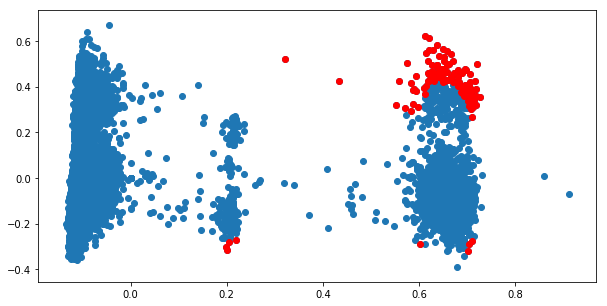

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(df_scaled[:,0], df_scaled[:,1])
#plt.plot([1,2,3], [3,4,5])
outliers = df_scaled[y_pred_train==-1]
plt.scatter(outliers[:,0], outliers[:,1], color='red')
plt.show()

In [59]:
data_process(insa,n_components=2)[1]

87.75913292252405

With 2 dimensional reduction, we get also 87.7% of variance, which is a good PCA. This method give a good visualization for our model.
 However, we see that our data separate clearly in 2 groups, and have a particular  geometric form. We must to find a method that is more convenient for this data.

# Method ElipticEnvelope-Method using Mahanalobis metric

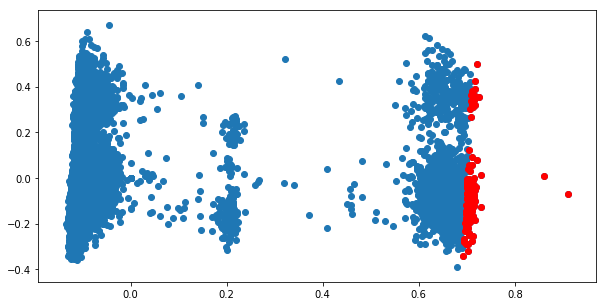

In [60]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=random_state, contamination=contamination).fit(df_scaled)
y_pred_train_ellipticEnvelope = cov.predict(df_scaled)

plt.figure(figsize=(10,5))
plt.scatter(df_scaled[:,0], df_scaled[:,1])
#plt.plot([1,2,3], [3,4,5])
outliers = df_scaled[y_pred_train_ellipticEnvelope==-1]
plt.scatter(outliers[:,0], outliers[:,1], color='red')
plt.show()

# Nearest Neighbors

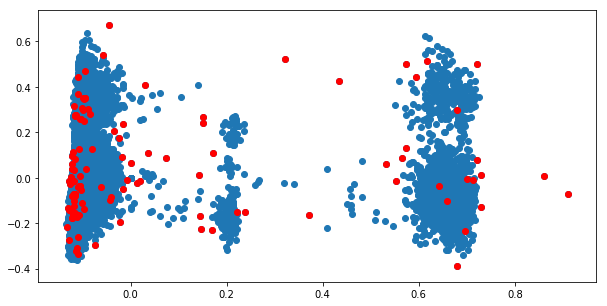

In [61]:
from sklearn.neighbors import LocalOutlierFactor
neigh = LocalOutlierFactor(n_neighbors=3, contamination=contamination)
y_pred_train_neigh = neigh.fit_predict(df_scaled)
#y_pred_train_neigh = neigh.predict(df_scaled)

plt.figure(figsize=(10,5))
plt.scatter(df_scaled[:,0], df_scaled[:,1])
outliers = df_scaled[y_pred_train_neigh==-1]
plt.scatter(outliers[:,0], outliers[:,1], color='red')
plt.show()